# Seattle Housing Project

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

## Overview and Preprocessing of Dataset

In [2]:
df = pd.read_csv("king_ country_ houses_aa.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# move target to the right
column_data = df.pop("price")
df["price"] = column_data
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,20150225T000000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [5]:
df.shape

(21613, 21)

In [6]:
# there are no nans
#df.isna().sum()

In [7]:
# there are no duplicates
#df.duplicated().sum()

In [8]:
#df.eq(" ").sum()

In [9]:
df.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price            float64
dtype: object

In [10]:
# convert date feature to datetime
df["date"] = pd.to_datetime(df["date"])

In [11]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [12]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,21613.0,4580301520.864988,1000102.0,2123049194.0,3904930410.0,7308900445.0,9900000190.0,2876565571.312049
date,21613,2014-10-29 04:38:01.959931648,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
bedrooms,21613.0,3.370842,0.0,3.0,3.0,4.0,33.0,0.930062
bathrooms,21613.0,2.114757,0.0,1.75,2.25,2.5,8.0,0.770163
sqft_living,21613.0,2079.899736,290.0,1427.0,1910.0,2550.0,13540.0,918.440897
sqft_lot,21613.0,15106.967566,520.0,5040.0,7618.0,10688.0,1651359.0,41420.511515
floors,21613.0,1.494309,1.0,1.0,1.5,2.0,3.5,0.539989
waterfront,21613.0,0.007542,0.0,0.0,0.0,0.0,1.0,0.086517
view,21613.0,0.234303,0.0,0.0,0.0,0.0,4.0,0.766318
condition,21613.0,3.40943,1.0,3.0,3.0,4.0,5.0,0.650743


## Visualize the Data

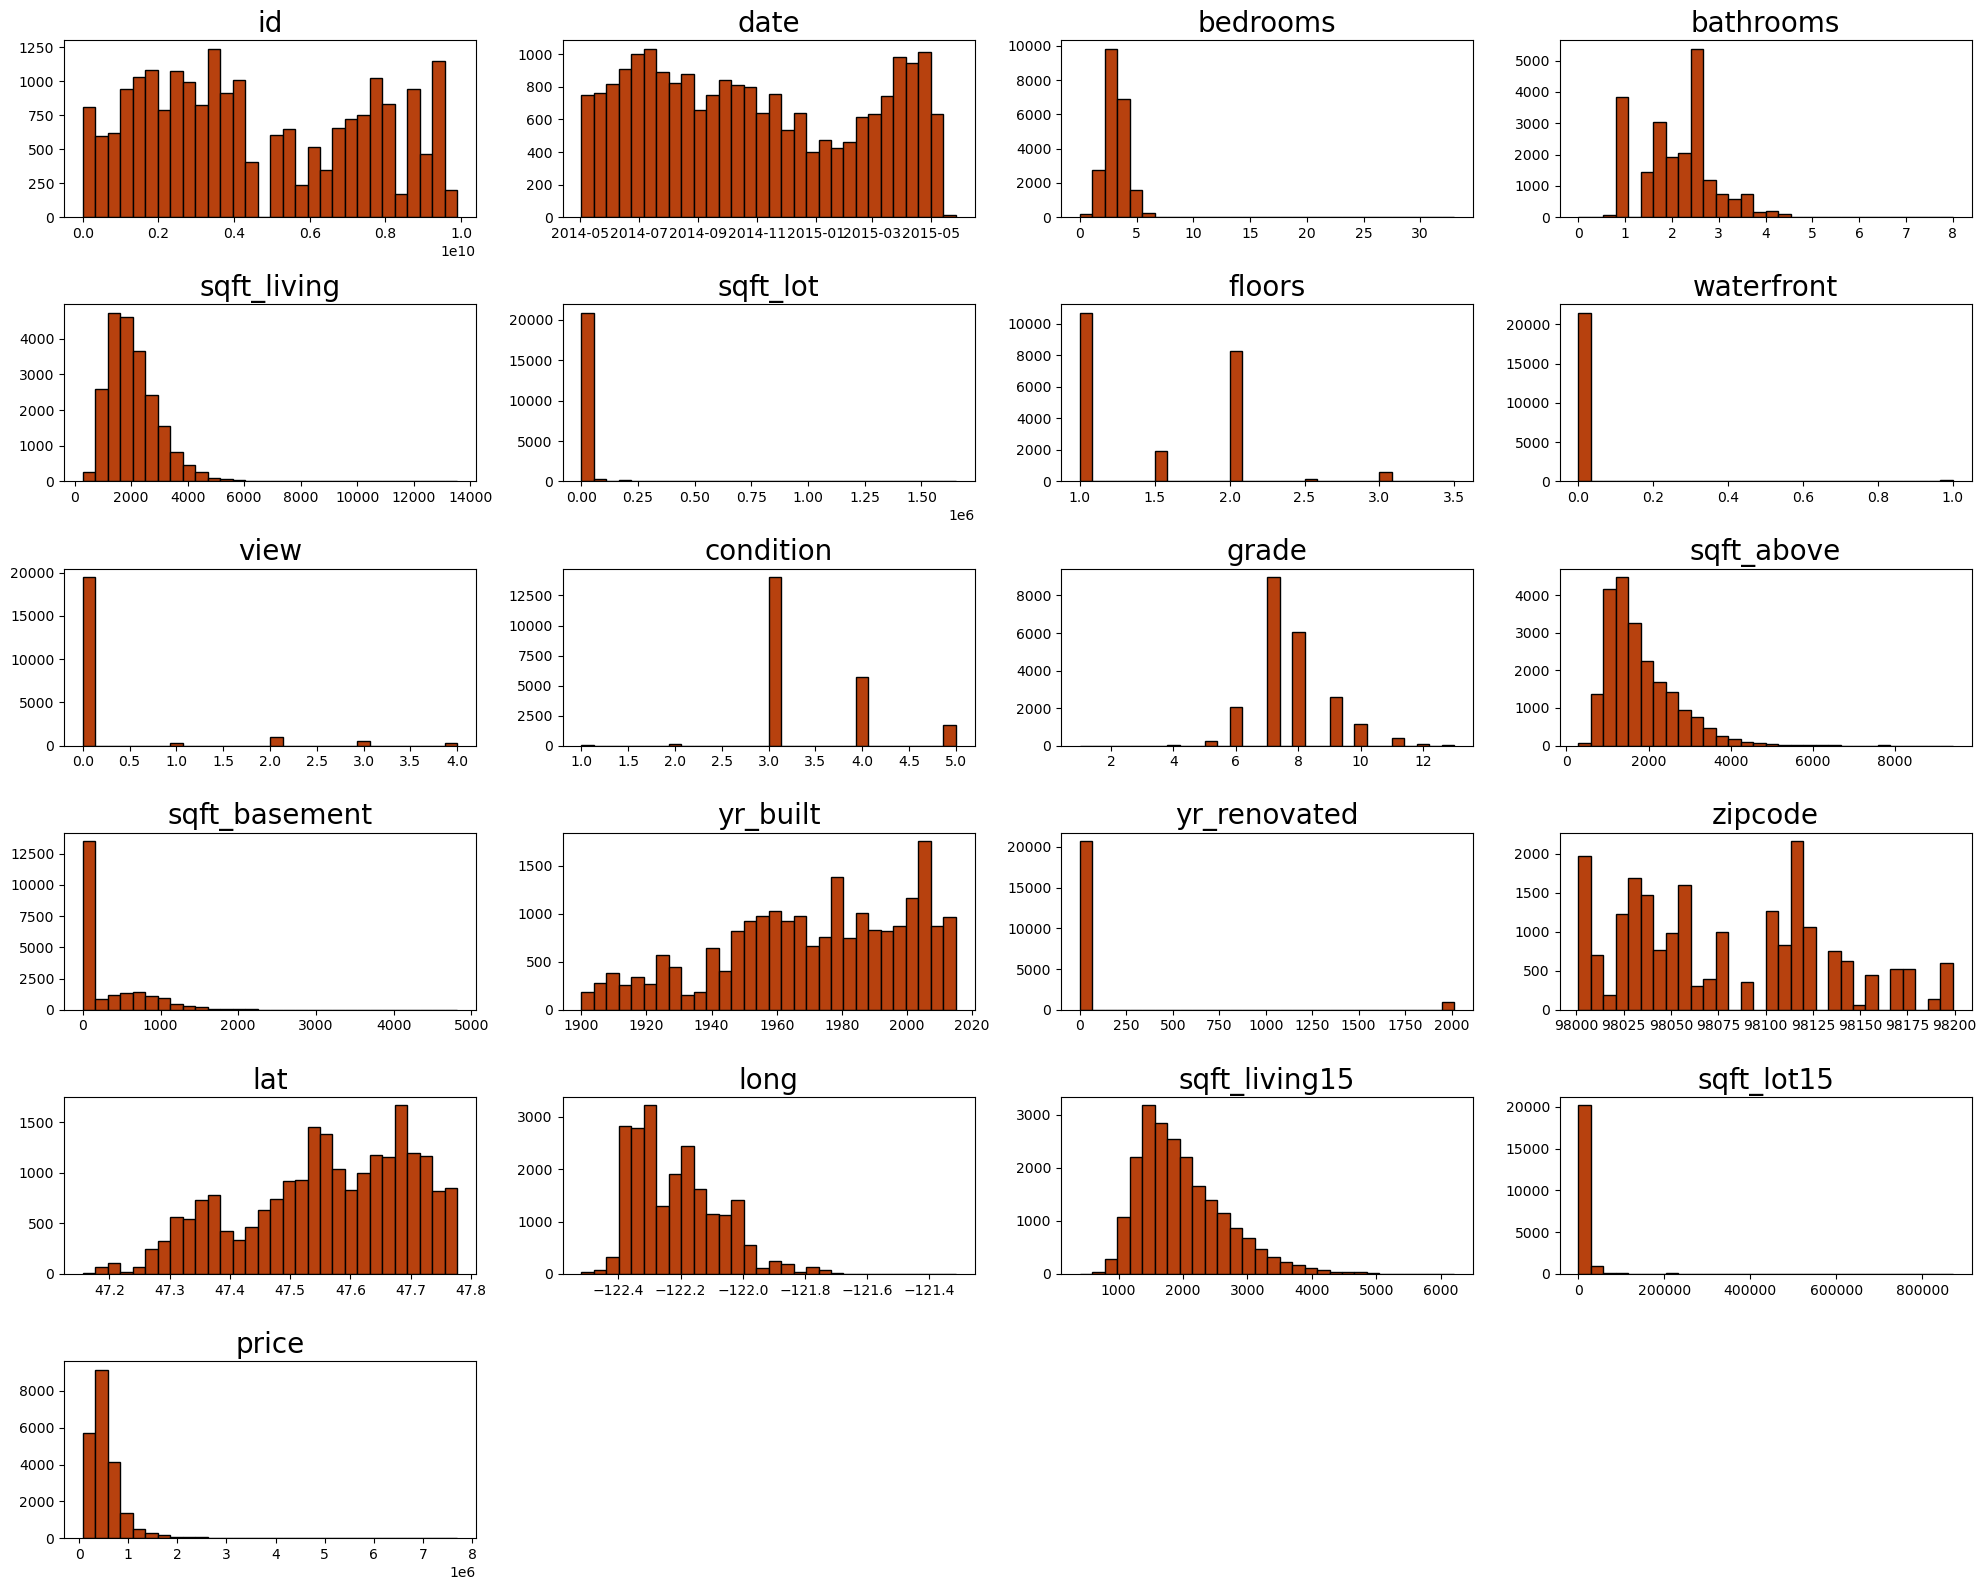

In [13]:
color = '#B7410E'

# grid size
nrows, ncols = 6, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i], fontsize=20)

plt.tight_layout()
plt.show()

#### First impression from histograms:

Uniform distributions (drop):

- id
- date

No inferential power (drop):

- yr_renovated
- sqft_lot 15

Geographical data (drop):

- zipcode
- lat
- long

Categoricals (drop?):

- bathrooms
- floors
- waterfront
- view
- condition
- grade


Variables to consider in the model (apply standarzation or normalization):

- bedrooms
- sqft_living
- sqft_above
- yr_built
- sqft_living15

Drop first and add later?:

- sqft_lot -  check for outliers
- sqft_basement - try normalization

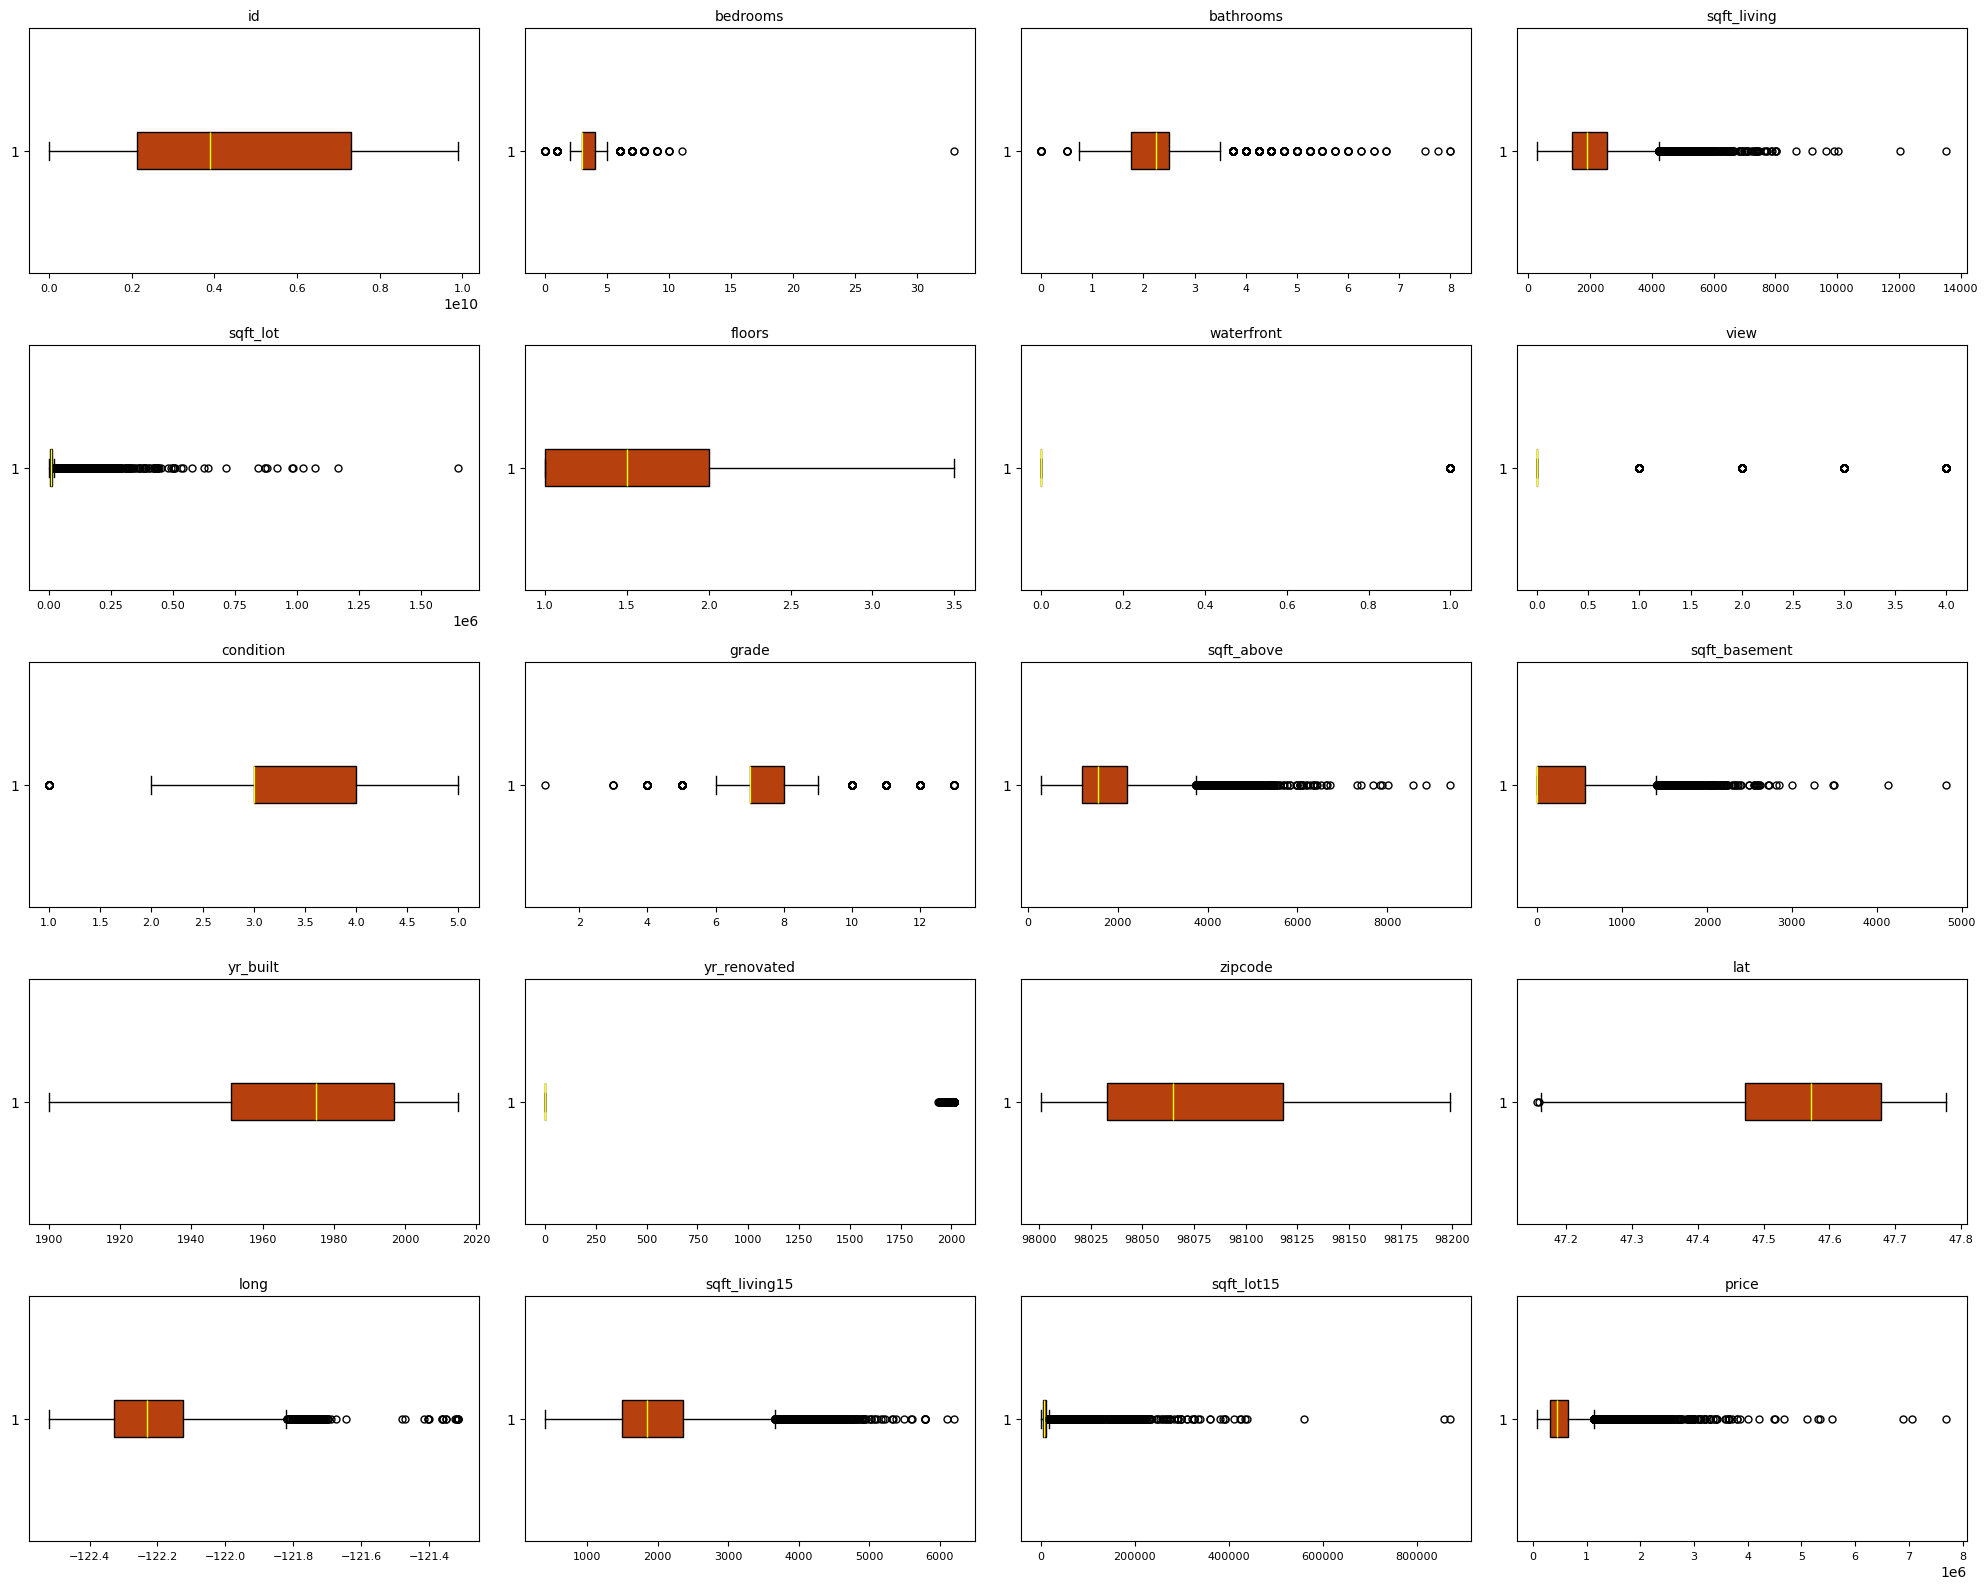

In [14]:
color = '#B7410E'

# grid size
nrows, ncols = 5, 4

#Excluding date to present boxplots

df_boxplot = df.drop(columns={"date"})

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_boxplot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_boxplot.iloc[:, i].dropna(), vert=False, patch_artist=True,
               boxprops=dict(facecolor=color, color='black'),
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'),
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_boxplot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

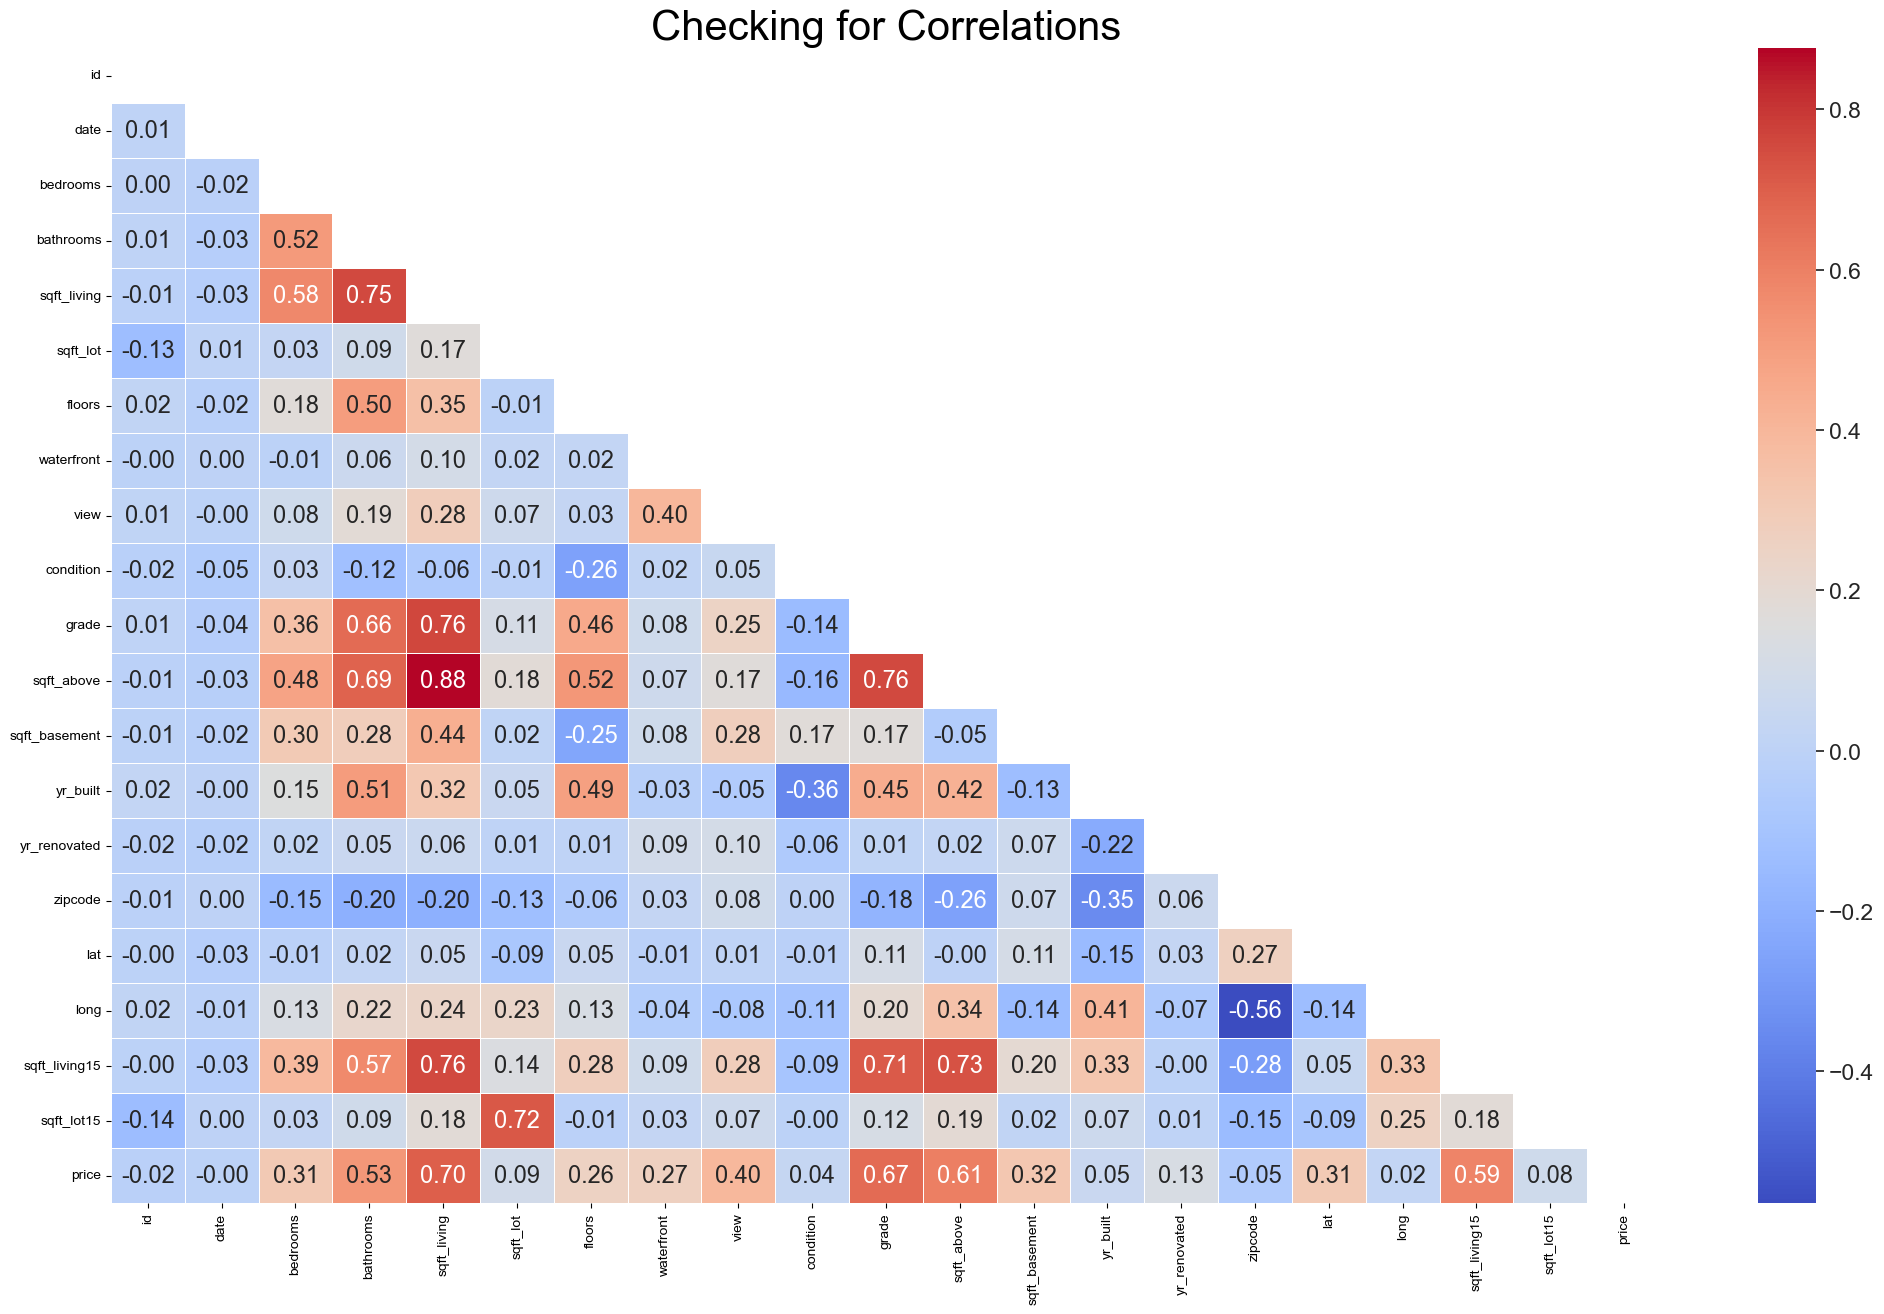

In [15]:
correlation_matrix = df.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 17}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Checking for Correlations", fontsize=30)
plt.show()

In [16]:
df1 = df[["bedrooms", "sqft_living", "sqft_above", "yr_built", "sqft_living15", "grade", "price"]]

In [17]:
df1.corrwith(df1["price"]).sort_values(ascending=False) #checking correlations with the target

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bedrooms         0.308350
yr_built         0.054012
dtype: float64

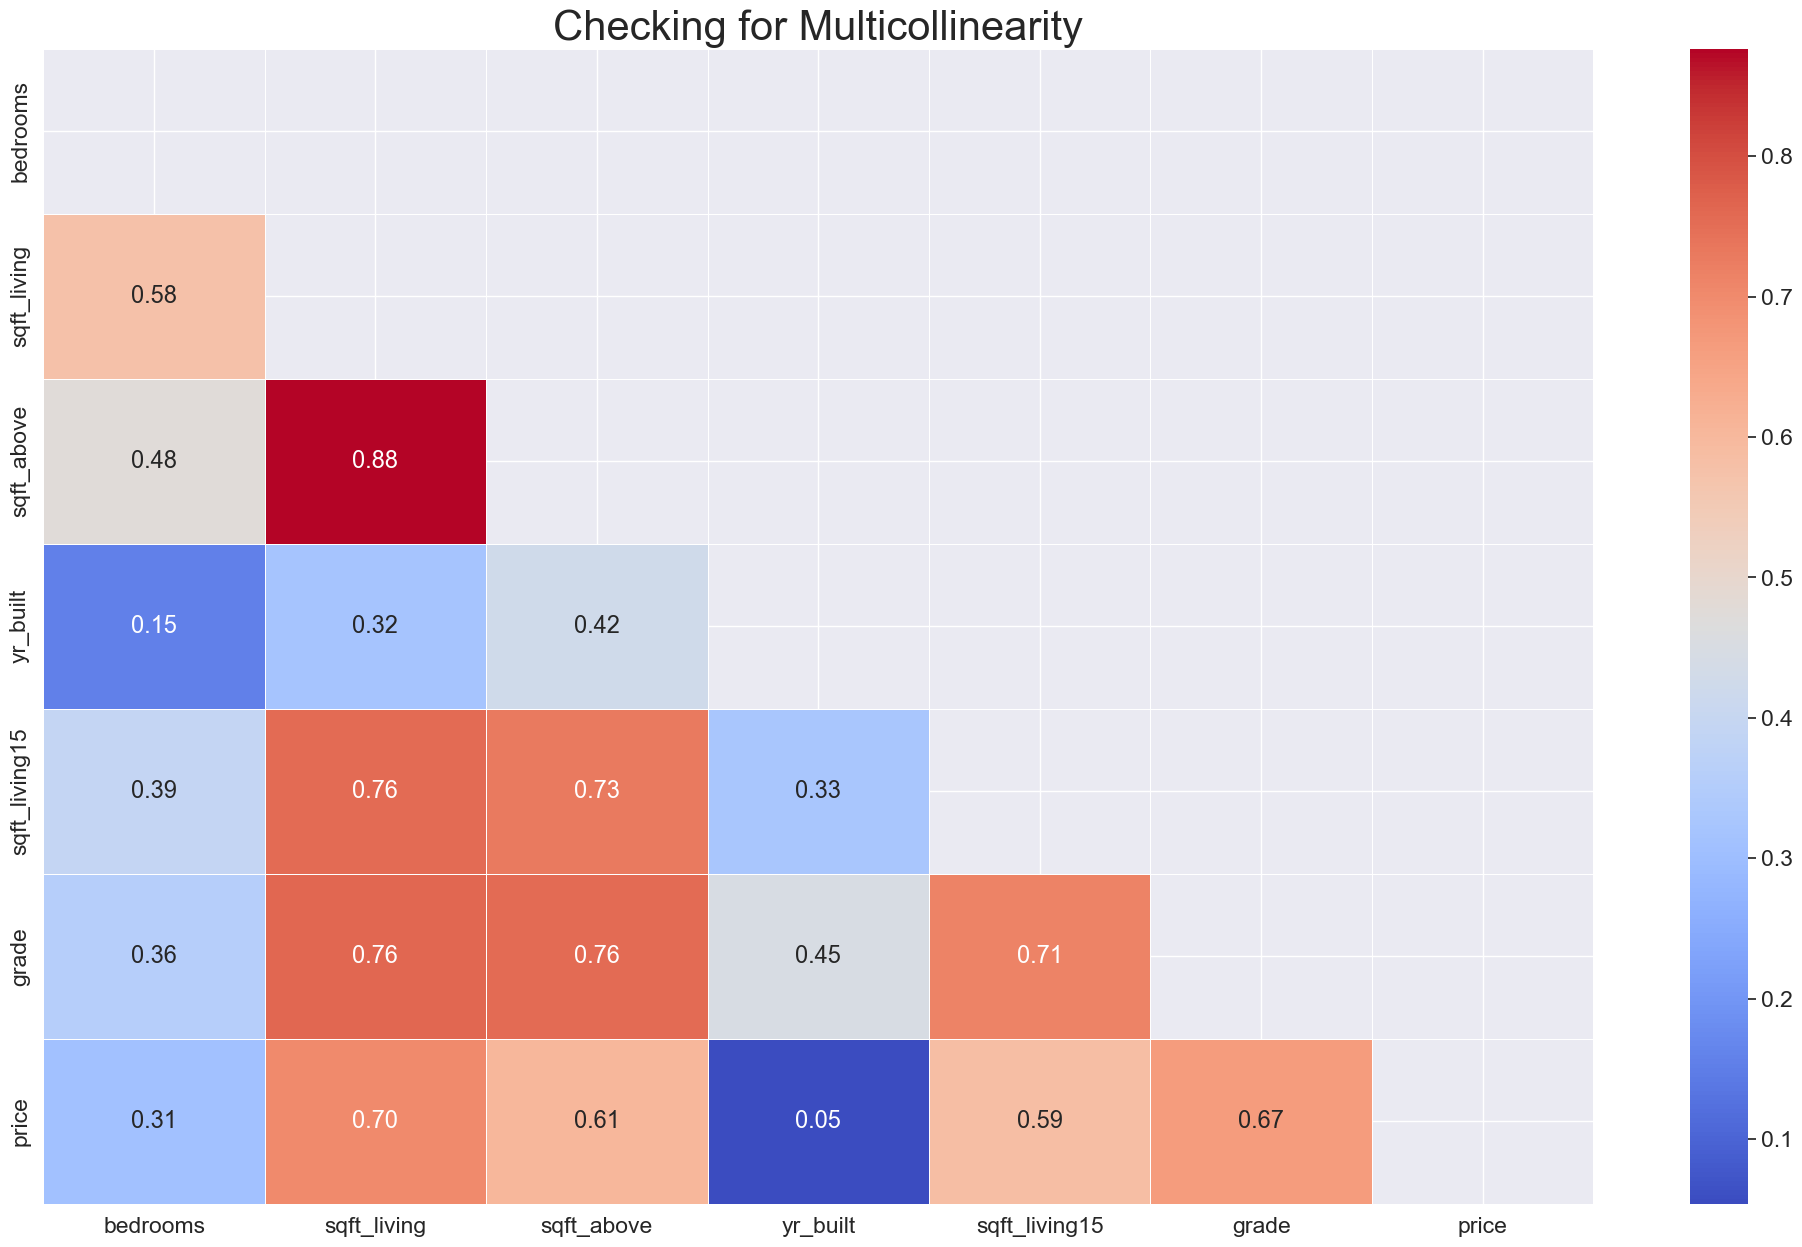

In [18]:
correlation_matrix = df1.corr()
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5)
ax = sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 17}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax)
ax.set_title("Checking for Multicollinearity", fontsize=30)
plt.show()

### Checking Multicollinearity:

1. Try going on with all features.
2. Drop some features based on Multicollinearity and test the metrics

Drop?:
- sqft_above
- sqft_living15
- grade

We decided not to drop given that we would end up with just a few features and would make no sense to continue.

In [19]:
df["date"] = df["date"].apply(lambda x: datetime.toordinal(x))

In [20]:
#Creating a duplicate df to keep the original
housing_new_df = df.copy()

In [21]:
X= housing_new_df.drop(columns= "price")
y= housing_new_df["price"]

In [22]:
X1= df1.drop(columns= "price")
y1= df1["price"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [26]:
print(f'100% of our data: {len(housing_new_df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


In [27]:
print(f'100% of our data: {len(df1)}.')
print(f'70% for training data: {len(X1_train)}.')
print(f'30% for test data: {len(X1_test)}.')

100% of our data: 21613.
70% for training data: 15129.
30% for test data: 6484.


## Normalization, Standardization

In [28]:
# normalization had no effect

"""
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n'

In [29]:
# standardization had no effect

"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\nX_train_scaled = scaler.fit_transform(X_train)\nX_test_scaled = scaler.transform(X_test)\n'

## Testing different Models

1. Model with all features
2. Model with reduced number of features

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#linear regression

model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
#linear regression

model1= LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

In [33]:
predictions= model.predict(X_test)
predictions

array([ 459400.01228362,  739004.73885895, 1231190.26586401, ...,
        374781.28958862,  816601.93514687,  572184.81332722])

In [34]:
predictions1= model1.predict(X1_test)
predictions1

array([ 506797.40137298,  682265.58740808, 1220159.723042  , ...,
        326408.0731469 ,  906176.88978466,  508969.67994837])

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [36]:
r2_linear = r2_score(y_test, predictions)
RMSE_linear = mean_squared_error(y_test, predictions, squared=False)
MSE_linear = mean_squared_error(y_test, predictions)
MAE_linear = mean_absolute_error(y_test, predictions)
print("R2 = ", round(r2_linear, 4))
print("RMSE = ", round(RMSE_linear, 4))
print("MSE =  ", round(MSE_linear, 4))
print("MAE = ", round(MAE_linear, 4))

R2 =  0.7007
RMSE =  207877.9729
MSE =   43213251633.2797
MAE =  127133.6428


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
r2_linear_1 = r2_score(y1_test, predictions1)
RMSE_linear_1 = mean_squared_error(y1_test, predictions1, squared=False)
MSE_linear_1 = mean_squared_error(y1_test, predictions1)
MAE_linear_1 = mean_absolute_error(y1_test, predictions1)
print("R2 = ", round(r2_linear_1, 4))
print("RMSE = ", round(RMSE_linear_1, 4))
print("MSE =  ", round(MSE_linear_1, 4))
print("MAE = ", round(MAE_linear_1, 4))

R2 =  0.6038
RMSE =  239174.0659
MSE =   57204233819.3898
MAE =  149932.6611


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [38]:
#ridge regression
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.0087e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [39]:
#ridge regression
from sklearn.linear_model import Ridge
ridge1 = Ridge()
ridge1.fit(X1_train, y1_train)

Ridge()

In [40]:
predictions_ridge = ridge.predict(X_test)

In [41]:
predictions_ridge1 = ridge1.predict(X1_test)

In [42]:
r2_ridge = r2_score(y_test, predictions_ridge)
RMSE_ridge = mean_squared_error(y_test, predictions_ridge, squared=False)
MSE_ridge = mean_squared_error(y_test, predictions_ridge)
MAE_ridge = mean_absolute_error(y_test, predictions_ridge)
print("R2 = ", round(r2_ridge, 4))
print("RMSE = ", round(RMSE_ridge, 4))
print("MSE = ", round(MSE_ridge, 4))
print("MAE = ", round(MAE_ridge, 4))

R2 =  0.7006
RMSE =  207910.9242
MSE =  43226952415.2896
MAE =  127128.8799


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [43]:
r2_ridge_1 = r2_score(y1_test, predictions_ridge1)
RMSE_ridge_1 = mean_squared_error(y1_test, predictions_ridge1, squared=False)
MSE_ridge_1 = mean_squared_error(y1_test, predictions_ridge1)
MAE_ridge_1 = mean_absolute_error(y1_test, predictions_ridge1)
print("R2 = ", round(r2_ridge_1, 4))
print("RMSE = ", round(RMSE_ridge_1, 4))
print("MSE = ", round(MSE_ridge_1, 4))
print("MAE = ", round(MAE_ridge_1, 4))

R2 =  0.6038
RMSE =  239174.3406
MSE =  57204365180.3494
MAE =  149932.2839


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.683e+14, tolerance: 1.977e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [45]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso1 = Lasso()
lasso1.fit(X1_train, y1_train)

Lasso()

In [46]:
predictions_lasso = lasso.predict(X_test)

In [47]:
predictions_lasso1 = lasso1.predict(X1_test)

In [48]:
r2_lasso = r2_score(y_test, predictions_lasso)
RMSE_lasso = mean_squared_error(y_test, predictions_lasso, squared=False)
MSE_lasso = mean_squared_error(y_test, predictions_lasso)
MAE_lasso = mean_absolute_error(y_test, predictions_lasso)
print("R2 = ", round(r2_lasso, 4))
print("RMSE = ", round(RMSE_lasso, 4))
print("MSE = ", round(MSE_lasso, 4))
print("MAE = ", round(MAE_lasso, 4))

R2 =  0.7007
RMSE =  207879.144
MSE =  43213738525.066
MAE =  127133.2084


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
r2_lasso_1 = r2_score(y1_test, predictions_lasso1)
RMSE_lasso_1 = mean_squared_error(y1_test, predictions_lasso1, squared=False)
MSE_lasso_1 = mean_squared_error(y1_test, predictions_lasso1)
MAE_lasso_1 = mean_absolute_error(y1_test, predictions_lasso1)
print("R2 = ", round(r2_lasso_1, 4))
print("RMSE = ", round(RMSE_lasso_1, 4))
print("MSE = ", round(MSE_lasso_1, 4))
print("MAE = ", round(MAE_lasso_1, 4))

R2 =  0.6038
RMSE =  239174.1025
MSE =  57204251306.0392
MAE =  149932.5847


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor()
tree1.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [52]:
predictions_tree = tree.predict(X_test)

In [53]:
predictions_tree1 = tree1.predict(X1_test)

In [54]:
r2_tree = r2_score(y_test, predictions_tree)
RMSE_tree = mean_squared_error(y_test, predictions_tree, squared=False)
MSE_tree = mean_squared_error(y_test, predictions_tree)
MAE_tree = mean_absolute_error(y_test, predictions_tree)
print("R2 = ", round(r2_tree, 4))
print("RMSE = ", round(RMSE_tree, 4))
print("MSE = ", round(MSE_tree, 4))
print("MAE = ", round(MAE_tree, 4))

R2 =  0.7334
RMSE =  196199.2755
MSE =  38494155722.915
MAE =  105014.2639


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
r2_tree_1 = r2_score(y1_test, predictions_tree1)
RMSE_tree_1 = mean_squared_error(y1_test, predictions_tree1, squared=False)
MSE_tree_1 = mean_squared_error(y1_test, predictions_tree1)
MAE_tree_1 = mean_absolute_error(y1_test, predictions_tree1)
print("R2 = ", round(r2_tree_1, 4))
print("RMSE = ", round(RMSE_tree_1, 4))
print("MSE = ", round(MSE_tree_1, 4))
print("MAE = ", round(MAE_tree_1, 4))

R2 =  0.4386
RMSE =  284695.9547
MSE =  81051786614.3331
MAE =  174412.1815


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [56]:
#KNN regression
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [57]:
#KNN regression
from sklearn.neighbors import KNeighborsRegressor
knn1 = KNeighborsRegressor()
knn1.fit(X1_train, y1_train)

KNeighborsRegressor()

In [58]:
predictions_knn = knn.predict(X_test)

In [59]:
predictions_knn1 = knn1.predict(X1_test)

In [60]:
r2_knn = r2_score(y_test, predictions_knn)
RMSE_knn = mean_squared_error(y_test, predictions_knn, squared=False)
MSE_knn = mean_squared_error(y_test, predictions_knn)
MAE_knn = mean_absolute_error(y_test, predictions_knn)
print("R2 = ", round(r2_knn, 4))
print("RMSE = ", round(RMSE_knn, 4))
print("MSE = ", round(MSE_knn, 4))
print("MAE = ", round(MAE_knn, 4))

R2 =  0.324
RMSE =  312391.8705
MSE =  97588680743.5297
MAE =  163680.28


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
r2_knn_1 = r2_score(y1_test, predictions_knn1)
RMSE_knn_1 = mean_squared_error(y1_test, predictions_knn1, squared=False)
MSE_knn_1 = mean_squared_error(y1_test, predictions_knn1)
MAE_knn_1 = mean_absolute_error(y1_test, predictions_knn1)
print("R2 = ", round(r2_knn_1, 4))
print("RMSE = ", round(RMSE_knn_1, 4))
print("MSE = ", round(MSE_knn_1, 4))
print("MAE = ", round(MAE_knn_1, 4))

R2 =  0.5184
RMSE =  263672.5726
MSE =  69523225565.4414
MAE =  167916.5812


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [62]:
#xgboost regression
import xgboost as xgb
xgbr = xgb.XGBRFRegressor()
xgbr.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [63]:
#xgboost regression
import xgboost as xgb
xgbr1 = xgb.XGBRFRegressor()
xgbr1.fit(X1_train, y1_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [64]:
predictions_xgb = xgbr.predict(X_test)

In [65]:
predictions_xgb1 = xgbr1.predict(X1_test)

In [66]:
r2_boost = r2_score(y_test, predictions_xgb)
RMSE_boost = mean_squared_error(y_test, predictions_xgb, squared=False)
MSE_boost = mean_squared_error(y_test, predictions_xgb)
MAE_boost = mean_absolute_error(y_test, predictions_xgb)
print("R2 = ", round(r2_boost, 4))
print("RMSE = ", round(RMSE_boost, 4))
print("MSE = ", round(MSE_boost, 4))
print("MAE = ", round(MAE_boost, 4))

R2 =  0.7592
RMSE =  186439.1314
MSE =  34759549706.0856
MAE =  100796.1977


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [67]:
r2_boost_1 = r2_score(y1_test, predictions_xgb1)
RMSE_boost_1 = mean_squared_error(y1_test, predictions_xgb1, squared=False)
MSE_boost_1 = mean_squared_error(y1_test, predictions_xgb1)
MAE_boost_1 = mean_absolute_error(y1_test, predictions_xgb1)
print("R2 = ", round(r2_boost_1, 4))
print("RMSE = ", round(RMSE_boost_1, 4))
print("MSE= ", round(MSE_boost_1, 4))
print("MAE = ", round(MAE_boost_1, 4))

R2 =  0.6558
RMSE =  222906.6958
MSE=  49687395011.9558
MAE =  136476.6534


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Linear Model Tuning

Dealing with multicollinearity and outliers within the Linear Regression Model

In [68]:
df2 = df.copy()

In [69]:
df2.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

In [70]:
df2.drop(columns=["sqft_living","sqft_above","id", "date","sqft_lot15","yr_renovated","waterfront","view"],inplace=True)

In [71]:
#Dealing with outliers

def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Dropping the outliers
    data = data[(data > lower_bound) & (data < upper_bound)]
    
    return data

In [72]:
df2 = tukeys_test_outliers(df2)

In [73]:
df2.dropna(inplace=True)

In [74]:
X2= df2.drop(columns= "price")
y2= df2["price"]

In [75]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
#linear regression

model_2= LinearRegression()
model_2.fit(X2_train, y2_train)

LinearRegression()

In [78]:
predictions2= model_2.predict(X2_test)
predictions2

array([382304.596088  , 503285.98321469, 603828.51688494, ...,
       569428.09248549, 489121.68814748, 574896.37486191])

In [79]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [80]:
r2_linear2 = r2_score(y2_test, predictions2)
RMSE_linear2 = mean_squared_error(y2_test, predictions2, squared=False)
MSE_linear2 = mean_squared_error(y2_test, predictions2)
MAE_linear2 = mean_absolute_error(y2_test, predictions2)
print("R2 = ", round(r2_linear2, 4))
print("RMSE = ", round(RMSE_linear2, 4))
print("MSE =  ", round(MSE_linear2, 4))
print("MAE = ", round(MAE_linear2, 4))

R2 =  0.6361
RMSE =  115400.964
MSE =   13317382491.9565
MAE =  87115.5422


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Gridsearch for XGBoost Tuning

In [81]:
# Gridsearch for XGBoost Tuning

In [82]:
from sklearn.model_selection import GridSearchCV
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42)
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 6, 7],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "colsample_bytree": [0.3, 0.6, 0.9, 1],
    "gamma": [0, 0.1, 0.2, 1, 2, 3]
}

In [84]:
grid_search = GridSearchCV(estimator=xgbr, param_grid=param_grid, scoring="r2", n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.6, 0.9, 1],
                         'gamma': [0, 0.1, 0.2, 1, 2, 3],
                         'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=1)

In [85]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.135597,0.005152,0.018726,0.004580,0.3,0,0.01,3,50,"{'colsample_bytree': 0.3, 'gamma': 0, 'learnin...",0.323129,0.327694,0.339652,0.351472,0.351109,0.338611,0.011675,1531
1,0.233044,0.014338,0.020297,0.005995,0.3,0,0.01,3,100,"{'colsample_bytree': 0.3, 'gamma': 0, 'learnin...",0.498725,0.502924,0.520495,0.539999,0.535667,0.519562,0.016667,1435
2,0.361376,0.017976,0.025118,0.004825,0.3,0,0.01,3,200,"{'colsample_bytree': 0.3, 'gamma': 0, 'learnin...",0.667897,0.673641,0.692731,0.714909,0.700926,0.690021,0.017340,1339
3,0.536176,0.029887,0.035131,0.007982,0.3,0,0.01,3,300,"{'colsample_bytree': 0.3, 'gamma': 0, 'learnin...",0.747243,0.753092,0.770698,0.790292,0.772146,0.766694,0.015271,1309
4,0.225754,0.012619,0.020590,0.004581,0.3,0,0.01,5,50,"{'colsample_bytree': 0.3, 'gamma': 0, 'learnin...",0.373920,0.380690,0.390575,0.404013,0.403199,0.390479,0.011958,1519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,4.097121,0.540098,0.117237,0.039037,1,3,0.3,6,300,"{'colsample_bytree': 1, 'gamma': 3, 'learning_...",0.865212,0.859224,0.891032,0.898065,0.869395,0.876586,0.015183,901
1532,0.869633,0.216643,0.039677,0.017083,1,3,0.3,7,50,"{'colsample_bytree': 1, 'gamma': 3, 'learning_...",0.853324,0.859270,0.885256,0.890092,0.874202,0.872429,0.014267,973
1533,2.052125,0.365162,0.054254,0.033929,1,3,0.3,7,100,"{'colsample_bytree': 1, 'gamma': 3, 'learning_...",0.851653,0.859783,0.886956,0.890319,0.873026,0.872348,0.014987,979
1534,3.331160,0.352410,0.071124,0.014418,1,3,0.3,7,200,"{'colsample_bytree': 1, 'gamma': 3, 'learning_...",0.851328,0.859613,0.886356,0.890263,0.872157,0.871944,0.014970,985


In [86]:
grid_search.best_params_

{'colsample_bytree': 0.6,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300}

In [87]:
xgbr_best = xgb.XGBRegressor(colsample_bytree=0.3, gamma=0, learning_rate=0.2, max_depth=5, n_estimators=300, random_state=42)
xgbr_best.fit(X_train, y_train)

predictions_xgb_best = xgbr_best.predict(X_test)

r2_boost_best = r2_score(y_test, predictions_xgb_best)
RMSE_boost_best = mean_squared_error(y_test, predictions_xgb_best, squared=False)
MSE_boost_best = mean_squared_error(y_test, predictions_xgb_best)
MAE_boost_best = mean_absolute_error(y_test, predictions_xgb_best)
print("R2 = ", round(r2_boost_best, 4))
print("RMSE = ", round(RMSE_boost_best, 4))
print("MSE = ", round(MSE_boost_best, 4))
print("MAE = ", round(MAE_boost_best, 4))

R2 =  0.8811
RMSE =  131039.6165
MSE =  17171381095.3839
MAE =  68294.3962


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
#final comparision
metrics = {
    'Model': ['Linear Regression','Linear Regression_clean', 'Linear Regression_tuning', 'Ridge', 'Ridge_clean', 'Lasso', 'Lasso_clean', 'Decision Tree', 'Decision Tree_clean', 'KNN', 'KNN_clean', 'XGBoost', 'XGBoost_clean', 'XGBoost_tuned'],
    'R²': [r2_linear, r2_linear_1, r2_linear2, r2_ridge, r2_ridge_1, r2_lasso, r2_lasso_1, r2_tree, r2_tree_1, r2_knn, r2_knn_1, r2_boost, r2_boost_1, r2_boost_best],
    'RMSE': [RMSE_linear, RMSE_linear_1, RMSE_linear2, RMSE_ridge, RMSE_ridge_1, RMSE_lasso, RMSE_lasso_1, RMSE_tree, RMSE_tree_1, RMSE_knn, RMSE_knn_1, RMSE_boost, RMSE_boost_1, RMSE_boost_best],
    'MSE': [MSE_linear, MSE_linear_1, MSE_linear2, MSE_ridge, MSE_ridge_1, MSE_lasso, MSE_lasso_1, MSE_tree, MSE_tree_1, MSE_knn, MSE_knn_1, MSE_boost, MSE_boost_1, MSE_boost_best],
    'MAE': [MAE_linear, MAE_linear_1, MAE_linear2, MAE_ridge, MAE_ridge_1, MAE_lasso, MAE_lasso_1, MAE_tree, MAE_tree_1, MAE_knn, MAE_knn_1, MAE_boost, MAE_boost_1, MAE_boost_best]
}

In [89]:
r2_linear2 = r2_score(y2_test, predictions2)
RMSE_linear2 = mean_squared_error(y2_test, predictions2, squared=False)
MSE_linear2 = mean_squared_error(y2_test, predictions2)
MAE_linear2 = mean_absolute_error(y2_test, predictions2)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [90]:
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Model")
df_metrics.round(2)

,Model,R²,RMSE,MSE,MAE
0,Linear Regression,0.70,207877.97,4.321325e+10,127133.64
1,Linear Regression_clean,0.60,239174.07,5.720423e+10,149932.66
2,Linear Regression_tuning,0.64,115400.96,1.331738e+10,87115.54
3,Ridge,0.70,207910.92,4.322695e+10,127128.88
4,Ridge_clean,0.60,239174.34,5.720437e+10,149932.28
5,Lasso,0.70,207879.14,4.321374e+10,127133.21
6,Lasso_clean,0.60,239174.10,5.720425e+10,149932.58
7,Decision Tree,0.73,196199.28,3.849416e+10,105014.26
8,Decision Tree_clean,0.44,284695.95,8.105179e+10,174412.18
9,KNN,0.32,312391.87,9.758868e+10,163680.28
